# ESM-1b embedding generation

In [1]:
!python vhpredictor/embedding_generate.py \
-emp 'vhpredictor_data/model/esm1b/esm1b_t33_650M_UR50S.pt' \
-f 'example/virus_protein.fasta' \
-pe 'example/embedding/virusprotein_embedding.pkl' \
-ve 'example/embedding/virus_embedding.pkl' \
--nogpu

With GPU: False
/home1/wliu4877/.conda/envs/vhpredictor/lib/python3.12/site-packages/esm/pretrained.py:70: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_data = torch.l

# VHPredictor

In [2]:
!python ./vhpredictor/vhpredictor_label_test.py \
-m 'vhpredictor_data/model/vhpredictor/vhpredictor_virus_central' \
-mt 'Virus-Central' \
-ep 'example/embedding/virus_embedding.pkl' \
-lip 'vhpredictor_data/vhdb/host_label_index' \
-olp 'example/result/'

[I 250118 20:09:45 vhpredictor_label_test:352] # Testing VHPredictor: model_path=vhpredictor_data/model/vhpredictor/vhpredictor_virus_central, model_type=Virus-Central, output_path=example/result/, top=10
[I 250118 20:09:45 vhpredictor_label_test:120] # Starting prediction for VHPredictor model in vhpredictor_data/model/vhpredictor/vhpredictor_virus_central
[I 250118 20:09:45 vhpredictor_label_test:124] Model Type = Virus-Central
[I 250118 20:09:45 util:151] Embeddings Loaded from example/embedding/virus_embedding.pkl.
Label index successfully loaded from vhpredictor_data/vhdb/host_label_index
[I 250118 20:09:45 vhpredictor_label_test:131] # Total label size: 4705
[I 250118 20:09:45 vhpredictor_label_test:148] Using CPU for prediction
/project/qcb_640/weiliu/VHPredictor/./vhpredictor/vhpredictor_label_test.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct m

# Probability prediction result

In [3]:
!cat example/result/vhpredictor_virus_central_virus_probability

Norovirus Hu/GII.4/Hong Kong/CUHK6080/2012/CHN	Homo sapiens	0.9929
Norovirus Hu/GII.4/Hong Kong/CUHK6080/2012/CHN	Chlorocebus aethiops	0.0031
Norovirus Hu/GII.4/Hong Kong/CUHK6080/2012/CHN	Macaca mulatta	0.0018
Norovirus Hu/GII.4/Hong Kong/CUHK6080/2012/CHN	Pan troglodytes	0.0012
Norovirus Hu/GII.4/Hong Kong/CUHK6080/2012/CHN	Sus scrofa	0.0011
Norovirus Hu/GII.4/Hong Kong/CUHK6080/2012/CHN	Mus musculus	0.0010
Norovirus Hu/GII.4/Hong Kong/CUHK6080/2012/CHN	Chlorocebus sabaeus	0.0004
Norovirus Hu/GII.4/Hong Kong/CUHK6080/2012/CHN	Bos taurus	0.0003
Norovirus Hu/GII.4/Hong Kong/CUHK6080/2012/CHN	Myodes glareolus	0.0002
Norovirus Hu/GII.4/Hong Kong/CUHK6080/2012/CHN	Felis catus	0.0002


# Label prediction result with probability higher than threshold (default: 0.1)

In [4]:
!cat example/result/vhpredictor_virus_central_virus_label

Norovirus Hu/GII.4/Hong Kong/CUHK6080/2012/CHN	Homo sapiens


# Taxonomy Result

Highest probability rows for each virus_name:
                                       virus_name     host_name  probability
0  Norovirus Hu/GII.4/Hong Kong/CUHK6080/2012/CHN  Homo sapiens       0.9929

Index: 0
Virus: Norovirus Hu/GII.4/Hong Kong/CUHK6080/2012/CHN
Top host: Homo sapiens (probability = 0.9929)
Taxonomy: [Species: Homo sapiens -> Genus: Homo -> Family: Hominidae -> Order: Primates -> Class: Mammalia -> Phylum: Chordata -> Kingdom: Metazoa]



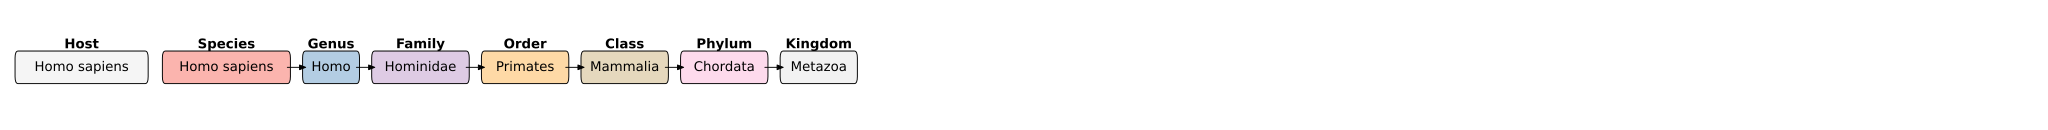

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import sys
project_root = './vhpredictor'
if project_root not in sys.path:
    sys.path.append(project_root)
from vhpredictor.vhpredictor_util.statistics_util import analyze_and_visualize

probability_file = "example/result/vhpredictor_virus_central_virus_probability"
taxonomy_file = "vhpredictor_data/vhdb/host_taxonomy"

analyze_and_visualize(probability_file, taxonomy_file)